# Solving the Cooperative Mission Replanning Problem (CMRP)

This notebook shows us how build a single model (GATR General) that can handle a diverse range of problem setups (different number of tasks, agents, discretization level) and compared it against specific model.

In [1]:
import os
from types import SimpleNamespace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graph_attention_replanner.config import (
    LogFileConfig,
    get_generator,
    get_env,
)

large_problem_setup_dict = {
    "mtsp_problem_type": 5,
    "min_num_task": 1,
    "max_num_task": 6,
    "min_num_agent": 1,
    "max_num_agent": 6,
    "min_discretize_level": 1,
    "max_discretize_level": 4,
    "num_node": 24,
    "batch_size": 10,
    "seed": 0
}
large_problem_setup = SimpleNamespace(**large_problem_setup_dict)

small_problem_setup_dict = {
    "mtsp_problem_type": 5,
    "num_task": 3,
    "num_agent": 3,
    "discretize_level": 2,
    "num_node": 6,
    "batch_size": 10,
    "seed": 0
}
small_problem_setup = SimpleNamespace(**small_problem_setup_dict)

# Training
Here, we try to train 3 models (1 general, 2 specific). 
- A General model that can solve the CMRP with up to 6 tasks, up to 6 agents, and up to 4 discretization levels.
- A specific model that can only solve CMRPs with 6 tasks, 6 agents, and 4 discretization levels.
- A specific model that can only solve CMRPs with 3 tasks, 3 agents, and 2 discretization levels.

After this section, you should have the following code artifacts in your cache (Default location of the cache is at `../../cache`)
<pre>
├── checkpoints
│   └── algo_reinforce
│       ├── problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250804163332
│       │   └── epoch_epoch=000.ckpt
│       ├── problem5_node24_task6to6_dislevel4to4_agent6to6_seed0_20250804163554
│       │   └── epoch_epoch=000.ckpt
│       └── problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_20250804163826
│           └── epoch_epoch=000.ckpt
</pre>

In [4]:
os.system(f"python ../method/gat/train.py --min_num_task {large_problem_setup.min_num_task} --max_num_task {large_problem_setup.max_num_task} --min_num_agent {large_problem_setup.min_num_agent} --max_num_agent {large_problem_setup.max_num_agent} --min_discretize_level {large_problem_setup.min_discretize_level} --max_discretize_level {large_problem_setup.max_discretize_level} --num_node {large_problem_setup.num_node} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --train_data_size 1000 --val_data_size 100 --max_epochs 1 --seed {large_problem_setup.seed} --disable_wandb")

{'mtsp_problem_type': 5, 'num_node': 24, 'exact_num_node': False, 'num_task': None, 'min_num_task': 1, 'max_num_task': 6, 'discretize_level': None, 'min_discretize_level': 1, 'max_discretize_level': 4, 'num_agent': None, 'min_num_agent': 1, 'max_num_agent': 6, 'batch_size': 10, 'device_id': 0, 'seed': 0, 'num_exp': 1, 'embed_dim': 128, 'num_encoder_layers': 8, 'num_heads': 4, 'train_data_size': 1000, 'val_data_size': 100, 'learning_rate': 1e-05, 'max_epochs': 1, 'algo': 'reinforce', 'disable_wandb': True}


Seed set to 0
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name                                   ┃ Type          ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ env                                    │ MTSPEnv_Type5 │      0 │ train │
│ 1  │ policy                                 │ AttentionMod… │  1.7 M │ train │
│ 2  │ policy.encoder                         │ AttentionMod… │  1.6 M │ train │
│ 3  │ policy.encoder.init_embedding          │ MTSPwithTLIn… │    896 │ train │
│ 4  │ policy.encoder.net                     │ GraphAttenti… │  1.6 M │ train │
│ 5  │ policy.decoder                         │ AttentionMod… │  115 K │ train │
│ 6  │ policy.decoder.context_embedding       │ MTSPContext   │ 33.3 K │ train │
│ 7  │ policy.decoder.dynamic_embedding       │ StaticEmbedd… │      0 │ train │
│ 8  │ policy.decoder.pointer                 │ PointerAtten… │ 16.4 K │ train │
│ 9  │ policy.decoder.projec

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 100/100 [01:40<00:00,  0.99it/s, v_num=20, train/reward=-34.2, train/loss=1.13e+3, val/reward=-44.2]


0

In [ ]:
os.system(f"python ../method/gat/train.py --num_task {large_problem_setup.max_num_task} --num_agent {large_problem_setup.max_num_agent} --discretize_level {large_problem_setup.max_discretize_level} --num_node {large_problem_setup.max_num_task*large_problem_setup.max_discretize_level} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --train_data_size 1000 --val_data_size 100 --max_epochs 1 --seed {large_problem_setup.seed} --disable_wandb")

{'mtsp_problem_type': 5, 'num_node': 24, 'exact_num_node': False, 'num_task': 6, 'min_num_task': 6, 'max_num_task': 6, 'discretize_level': 4, 'min_discretize_level': 4, 'max_discretize_level': 4, 'num_agent': 6, 'min_num_agent': 6, 'max_num_agent': 6, 'batch_size': 10, 'device_id': 0, 'seed': 0, 'num_exp': 1, 'embed_dim': 128, 'num_encoder_layers': 8, 'num_heads': 4, 'train_data_size': 1000, 'val_data_size': 100, 'learning_rate': 1e-05, 'max_epochs': 1, 'algo': 'reinforce', 'disable_wandb': True}


Seed set to 0
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name                                   ┃ Type          ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ env                                    │ MTSPEnv_Type5 │      0 │ train │
│ 1  │ policy                                 │ AttentionMod… │  1.7 M │ train │
│ 2  │ policy.encoder                         │ AttentionMod… │  1.6 M │ train │
│ 3  │ policy.encoder.init_embedding          │ MTSPwithTLIn… │    896 │ train │
│ 4  │ policy.encoder.net                     │ GraphAttenti… │  1.6 M │ train │
│ 5  │ policy.decoder                         │ AttentionMod… │  115 K │ train │
│ 6  │ policy.decoder.context_embedding       │ MTSPContext   │ 33.3 K │ train │
│ 7  │ policy.decoder.dynamic_embedding       │ StaticEmbedd… │      0 │ train │
│ 8  │ policy.decoder.pointer                 │ PointerAtten… │ 16.4 K │ train │
│ 9  │ policy.decoder.projec

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 100/100 [01:31<00:00,  1.09it/s, v_num=6, train/reward=-58.6, train/loss=366.0]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 100/100 [01:38<00:00,  1.01it/s, v_num=6, train/reward=-58.6, train/loss=366.0, val/reward=-52.9]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 100/100 [01:52<00:00,  0.89it/s, v_num=6, train/reward=-58.6, train/loss=366.0, val/reward=-52.9]


0

In [ ]:
os.system(f"python ../method/gat/train.py --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_node} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --train_data_size 1000 --val_data_size 100 --max_epochs 1 --seed {small_problem_setup.seed} --disable_wandb")

{'mtsp_problem_type': 5, 'num_node': 6, 'exact_num_node': False, 'num_task': 3, 'min_num_task': 3, 'max_num_task': 3, 'discretize_level': 2, 'min_discretize_level': 2, 'max_discretize_level': 2, 'num_agent': 3, 'min_num_agent': 3, 'max_num_agent': 3, 'batch_size': 10, 'device_id': 0, 'seed': 0, 'num_exp': 1, 'embed_dim': 128, 'num_encoder_layers': 8, 'num_heads': 4, 'train_data_size': 1000, 'val_data_size': 100, 'learning_rate': 1e-05, 'max_epochs': 1, 'algo': 'reinforce', 'disable_wandb': True}


Seed set to 0
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name                                   ┃ Type          ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ env                                    │ MTSPEnv_Type5 │      0 │ train │
│ 1  │ policy                                 │ AttentionMod… │  1.7 M │ train │
│ 2  │ policy.encoder                         │ AttentionMod… │  1.6 M │ train │
│ 3  │ policy.encoder.init_embedding          │ MTSPwithTLIn… │    896 │ train │
│ 4  │ policy.encoder.net                     │ GraphAttenti… │  1.6 M │ train │
│ 5  │ policy.decoder                         │ AttentionMod… │  115 K │ train │
│ 6  │ policy.decoder.context_embedding       │ MTSPContext   │ 33.3 K │ train │
│ 7  │ policy.decoder.dynamic_embedding       │ StaticEmbedd… │      0 │ train │
│ 8  │ policy.decoder.pointer                 │ PointerAtten… │ 16.4 K │ train │
│ 9  │ policy.decoder.projec

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 100/100 [00:38<00:00,  2.62it/s, v_num=7, train/reward=-31.1, train/loss=-5.33]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 100/100 [00:40<00:00,  2.46it/s, v_num=7, train/reward=-31.1, train/loss=-5.33, val/reward=-25.9]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 100/100 [00:45<00:00,  2.20it/s, v_num=7, train/reward=-31.1, train/loss=-5.33, val/reward=-25.9]


0

# Generate Data
Generate 2 set of data
- 10 instance of CMRPs with 6 tasks, 6 agents, and 4 discretization levels.
- 10 instance of CMRPs with 3 tasks, 3 agents, and 2 discretization levels.

After this section, you should have the following code artifacts in your cache (Default location of the cache is at `../../cache`)
<pre>
├── data
│   └── general
│       ├── problem5_node24_task6to6_dislevel4to4_agent6to6_seed0_bs10.npz
│       └── problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz
</pre>

In [ ]:
os.system(f"python ../run/gen_data.py --num_task {large_problem_setup.max_num_task} --num_agent {large_problem_setup.max_num_agent} --discretize_level {large_problem_setup.max_discretize_level} --num_node {large_problem_setup.num_node} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

0

In [ ]:
os.system(f"python ../run/gen_data.py --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_node} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --seed {small_problem_setup.seed}")

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

0

# Evaluation
We will conduct 4 evaluations, namely the followings:
<pre>
+---------------+-------------------+---------------------+---------------------+
|               |                   |                     |                     |
+---------------+-------------------+---------------------+---------------------+
|               | General Model     | Specific Model (Small) | Specific Model (Large) |
| Large Dataset | v                 |                     | v                   |
| Small Dataset | v                 | v                   |                     |
+---------------+-------------------+---------------------+---------------------+
</pre>
After this section, you should have the following code artifacts in your cache (Default location of the cache is at `../../cache`)
<pre>
└── results
    ├── gat
    │   ├── problem5_node24_task6to6_dislevel4to4_agent6to6_bs10_exp1_dataseed0_methodseed0.csv
    │   └── problem5_node6_task3to3_dislevel2to2_agent3to3_bs10_exp1_dataseed0_methodseed0.csv
    └── gat_gen
        ├── problem5_node24_task6to6_dislevel4to4_agent6to6_bs10_exp1_dataseed0_methodseed0.csv
        └── problem5_node6_task3to3_dislevel2to2_agent3to3_bs10_exp1_dataseed0_methodseed0.csv

</pre>

General Model on Large Dataset

In [10]:
os.system(f"python ../method/gat/eval_gat_generalize.py --num_task {large_problem_setup.max_num_task} --num_agent {large_problem_setup.max_num_agent} --discretize_level {large_problem_setup.max_discretize_level} --num_node {large_problem_setup.num_node} --mtsp_problem_type 5 --method_mtsp_problem_type 5 --batch_size {large_problem_setup.batch_size} --num_exp {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")

['/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250805141817', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250805143728', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250804163332', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250806213617', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20241230232757']
Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250805141817/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node24_task6

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node24_task6to6_dislevel4to4_agent6to6_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 53.92906188964844 ± 19.743438720703125. 
Standard Error: 6.2434234619140625
Avg Wall Time(s): 0.004740095138549805
------------------------------------------





0

General Model on Small Dataset

In [9]:
os.system(f"python ../method/gat/eval_gat_generalize.py --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_node} --mtsp_problem_type 5 --method_mtsp_problem_type 5 --batch_size {small_problem_setup.batch_size} --num_exp {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")

['/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250805141817', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250805143728', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250804163332', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250806213617', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20241230232757']
Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task1to6_dislevel1to4_agent1to6_seed0_20250805141817/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3t

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 33.90739059448242 ± 8.963428497314453. 
Standard Error: 2.8344850540161133
Avg Wall Time(s): 0.00544741153717041
------------------------------------------





0

Specific Model (Small) on Small Dataset

In [11]:
os.system(f"python ../method/gat/eval_gat.py --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_node} --mtsp_problem_type 5 --method_mtsp_problem_type 5 --batch_size {small_problem_setup.batch_size} --num_exp {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")

['/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_20250804163826', '/Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_20250806094407']
Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_20250804163826/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/gat/problem5_node6_task3to3_dislevel2to2_agent3to3_bs10_exp1_dataseed0_methodseed0.csv ...


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node6_task3to3_dislevel2to2_agent3to3_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 27.64629364013672 ± 7.331835746765137. 
Standard Error: 2.3185300827026367
Avg Wall Time(s): 0.0019737958908081056
------------------------------------------





0

Specific Model (Large) on Large Dataset

In [12]:
os.system(f"python ../method/gat/eval_gat.py --num_task {large_problem_setup.max_num_task} --num_agent {large_problem_setup.max_num_agent} --discretize_level {large_problem_setup.max_discretize_level} --num_node {large_problem_setup.num_node} --mtsp_problem_type 5 --method_mtsp_problem_type 5 --batch_size {large_problem_setup.batch_size} --num_exp {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")

Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node24_task6to6_dislevel4to4_agent6to6_seed0_20250804163554/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node24_task6to6_dislevel4to4_agent6to6_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/gat/problem5_node24_task6to6_dislevel4to4_agent6to6_bs10_exp1_dataseed0_methodseed0.csv ...


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node24_task6to6_dislevel4to4_agent6to6_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 53.02010726928711 ± 17.887714385986328. 
Standard Error: 5.656591892242432
Avg Wall Time(s): 0.00435631275177002
------------------------------------------





0

# Visualize Results

Result Table - Average Mission Time and Runtime of General Vs Specific Model in Large or Small Problem Settings

In [2]:
def get_saved_data(setup, model="gat_gen", type="result"):
    task_agent_dislvl = []
    for attr in ["max_num_task", "max_num_agent", "max_discretize_level", ]:
        if hasattr(setup, attr):
            task_agent_dislvl.append(getattr(setup, attr))
        else:
            task_agent_dislvl.append(getattr(setup, attr[4:]))
    num_task, num_agent, discretize_level = task_agent_dislvl

    cfg = LogFileConfig(
            setup.mtsp_problem_type,
            setup.num_node,
            num_task,
            num_task,
            discretize_level,
            discretize_level,
            num_agent,
            num_agent,
            setup.batch_size,
            read_only=True,
        )
    if type == "result":
        result_path = cfg.get_result_logfilename(
            seed=setup.seed,
            method_seed=setup.seed,
            method=model,
            format="csv",
            override_mtsp_problem_type=setup.mtsp_problem_type,
        )
        return result_path
    elif type == "data":
        data_path = cfg.get_data_logfilename(
            seed=setup.seed, format="npz", override_mtsp_problem_type=setup.mtsp_problem_type
        )
        return data_path
    else:
        raise ValueError("Invalid type specified. Use 'result' or 'data'.")
    


df_list = []
path = get_saved_data(large_problem_setup, model="gat_gen", type="result")
df = pd.read_csv(path)
df["model"] = "General Model"
df["dataset"] = "Large Problem Setup"
df_list.append(df)

path = get_saved_data(small_problem_setup, model="gat_gen", type="result")
df = pd.read_csv(path)
df["model"] = "General Model"
df["dataset"] = "Small Problem Setup"
df_list.append(df)

path = get_saved_data(small_problem_setup, model="gat", type="result")
df = pd.read_csv(path)
df["model"] = "Specific Model (Small)"
df["dataset"] = "Small Problem Setup"
df_list.append(df)

path = get_saved_data(large_problem_setup, model="gat", type="result")
df = pd.read_csv(path)
df["model"] = "Specific Model (Large)"
df["dataset"] = "Large Problem Setup"
df_list.append(df)

MERGED_DF = pd.concat(df_list, ignore_index=True)

# Group and aggregate
agg_df = MERGED_DF.groupby(["dataset", "model"]).agg({
    "mission_time": lambda x: round(x.mean(), 2),
    "runtime": lambda x: round(x.mean(), 6)
})

# Format values as strings
agg_df["result"] = agg_df.apply(
    lambda row: f"mission time: {row['mission_time']}s runtime: {row['runtime']}s", axis=1
)

# Pivot into final table format
pivot_df = agg_df["result"].unstack(fill_value="NA")

# Reorder rows and columns
row_order = ["Large Problem Setup", "Small Problem Setup"]
col_order = ["General Model", "Specific Model (Small)", "Specific Model (Large)"]
pivot_df = pivot_df.reindex(index=row_order, columns=col_order)
pivot_df

model,General Model,Specific Model (Small),Specific Model (Large)
dataset,,,
Large Problem Setup,mission time: 53.93s runtime: 0.00474s,NA,mission time: 53.02s runtime: 0.004356s
Small Problem Setup,mission time: 33.91s runtime: 0.005447s,mission time: 27.65s runtime: 0.001974s,NA


In [3]:
def visualize_action(setup, model, exp_num=1, ax=None):
    task_agent_dislvl = []
    for attr in ["max_num_task", "max_num_agent", "max_discretize_level", ]:
        if hasattr(setup, attr):
            task_agent_dislvl.append(getattr(setup, attr))
        else:
            task_agent_dislvl.append(getattr(setup, attr[4:]))
    num_task, num_agent, discretize_level = task_agent_dislvl
    
    generator = get_generator(5)(
        num_node=setup.num_node,
        min_num_task=num_task,
        max_num_task=num_task,
        min_discretize_level=discretize_level,
        max_discretize_level=discretize_level,
        min_num_agent=num_agent,
        max_num_agent=num_agent,
        seed=setup.seed,
    )
    env = get_env(5)(generator)

    path = get_saved_data(setup, model, type="result")
    df = pd.read_csv(path).iloc[exp_num]
    action_str = df["tour"]
    action = np.array([int(x) for x in action_str.strip('[]').split(',')])

    # Convert action to specific action for small problem setup

    if setup == small_problem_setup and model == "gat_gen":
        print(f"Action: {action}")
        genaction2specificaction = [0]
        for d in range(discretize_level):
            for t in range(num_task):
                genaction2specificaction.append(t+1)
        for _ in range(large_problem_setup.num_node-small_problem_setup.num_node):
            genaction2specificaction.append(0)
        for a in range(num_agent):
            offset = num_task + 1
            genaction2specificaction.append(offset + a)
        for _ in range(large_problem_setup.max_num_agent - small_problem_setup.num_agent):
            genaction2specificaction.append(0)
        print(f"genaction2specificaction: {genaction2specificaction}")
        action = np.array([genaction2specificaction[a] for a in action])
        print(f"Action: {action}")
    visualize_task_not_splitted = True
    reward = df["mission_time"]
    path = get_saved_data(setup, model, type="data")
    td = env.load_data(path, batch_size=setup.batch_size)
    env.render(
        td[exp_num], action, reward=reward, visualize_task_not_splitted=visualize_task_not_splitted, ax=ax
    )

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

Action: [25  3  6  2  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24  1
  4  0  0  0  0  0]
genaction2specificaction: [0, 1, 2, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 6, 0, 0, 0]
Action: [4 3 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

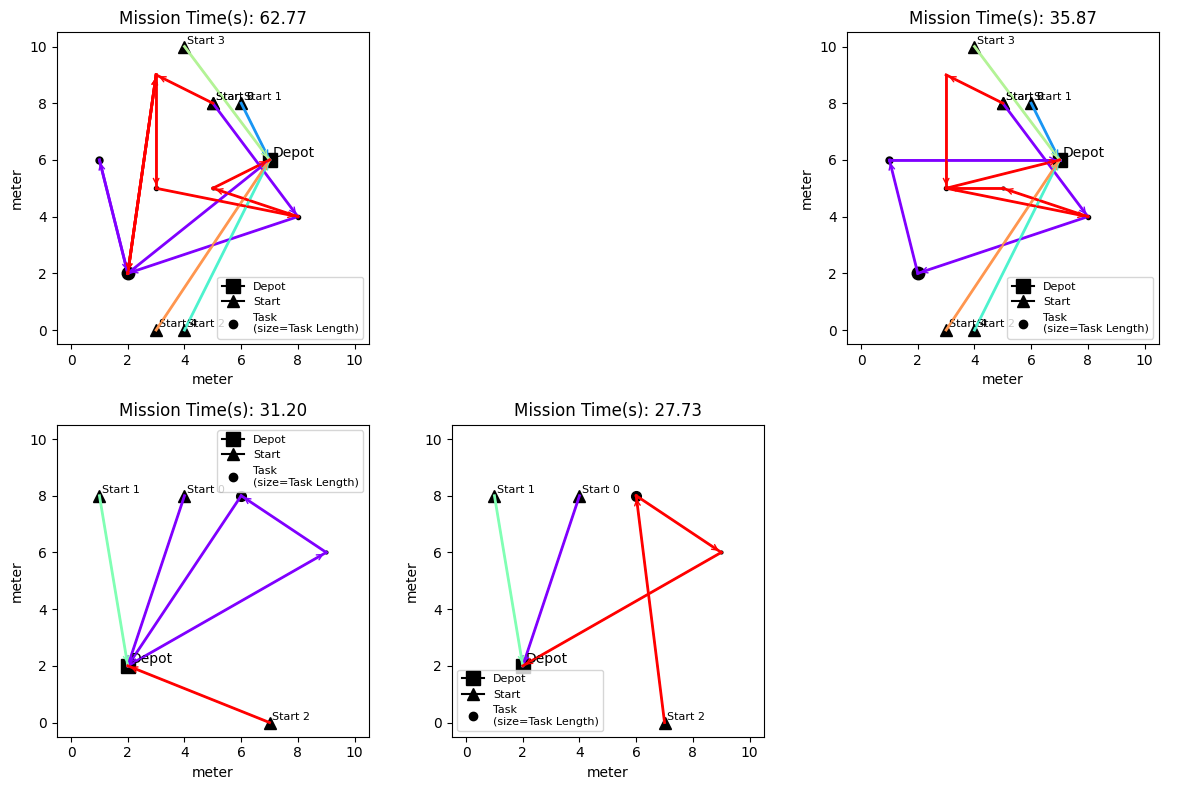

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))
ax[0,1].axis('off')
ax[1,2].axis('off')
visualize_action(large_problem_setup, "gat_gen", ax=ax[0, 0])
visualize_action(small_problem_setup, "gat_gen", ax=ax[1, 0])
visualize_action(small_problem_setup, "gat", ax=ax[1, 1])
visualize_action(large_problem_setup, "gat", ax=ax[0, 2])
